In [2]:
import sys
sys.path.append('/Users/billystrickland/Documents/code/resonators')
import matplotlib.pyplot as plt
from shabanipy.labber import LabberData
from shabanipy.resonators.notch_geometry import fit_complex
import numpy as np
import cmath 
import os
from shabanipy.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.jy_mpl_settings.colors import line_colors
import utils.resonator_functions as rf
import utils.qubit_functions as qf

plt.style.use(jy_mpl_rc)

In [3]:
savepath = '/Users/billystrickland/Documents/code/resonators/data/'
root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data/'

In [4]:
def plot_trace(freq, data, trace=''):
    """
    Plot a trace of the frequency response, converted to dB scale.

    Parameters:
    freq (array-like): Frequency data in Hz.
    data (array-like): Data corresponding to the frequency response.
    trace (str, optional): Label for the trace being plotted (default is an empty string).
    """
    # Convert the data to dB scale and normalize by subtracting the final value
    db = rf.to_db(abs(data)) - rf.to_db(abs(data[-1]))

    # Convert frequency to GHz and then shift it by the minimum dB point for better visualization
    freq = np.array(freq) * 1e-9  # Convert frequency to GHz

    # Plot the data, shifting frequency to center around the minimum dB value
    plt.plot((freq - freq[np.argmin(db)]) * 1e3, db, label=trace)  # Convert frequency to MHz

    # Label the axes
    plt.xlabel('$\Delta$ Freq (MHz)')
    plt.ylabel('$S_{21}$ (dB)')

    # Optionally add the legend if a trace label is provided
    if trace:
        plt.legend()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


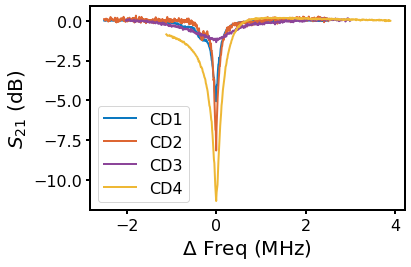

In [5]:
# File paths for the data files
file1 = '2024/01/Data_0108/Candlequbits-WMS-001-053.hdf5'
file2 = '2024/01/Data_0129/candlequbits-CD2-LJBJLWMS-011.hdf5'
file3 = '2024/02/Data_0204/candlequbits-CD3-WMSLJB-011.hdf5'
file4 = '2024/02/Data_0208/candlequbits-CD4-WMSLJB-004.hdf5'

# List of file paths
FILES = [root + file1, root + file2, root + file3, root + file4]

# Trace labels corresponding to each file
traces = ['CD' + str(i + 1) for i in range(4)]

# Channel names for P and S21 data
P_CH, S21_CH = ['Repeat', 'VNA - S21']

# Loop through each file and plot the corresponding trace
for i, FILE in enumerate(FILES):
    with LabberData(FILE) as f:
        # Get frequency and S21 data
        freq, data = f.get_data(S21_CH, get_x=True)
        
        # Plot data with corresponding trace label
        if i == 0:
            plot_trace(freq[0], data[0], trace=traces[i])  # First file gets specific treatment
        else:
            plot_trace(freq, data, trace=traces[i])  # Other files follow the regular process
        
        plt.legend()  # Add the legend to the plot

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the plot as an EPS file
plt.savefig('candles.eps', format='eps')


In [39]:
print('CD1 = Input -20dB on MXC plate, 2 isolators, TWPA -10dB on MXC plate')
print('CD2 = Input -40dB on MXC plate, 2 isolators, TWPA -10dB on MXC plate, -20dB on output line')
print('CD3 = Input -40dB on MXC plate, 2 isolators, TWPA -10dB on MXC plate, circulator with Minicircuits terminator, extra cable')
print('CD4 = Input -40dB (Qµ) on MXC plate, 2 isolators, TWPA -20dB (Qµ) on MXC plate, circulator with Qµ terminator, no extra cable')


CD1 = Input -20dB on MXC plate, 2 isolators, TWPA -10dB on MXC plate
CD2 = Input -40dB on MXC plate, 2 isolators, TWPA -10dB on MXC plate, -20dB on output line
CD3 = Input -40dB on MXC plate, 2 isolators, TWPA -10dB on MXC plate, circulator with Minicircuits terminator, extra cable
CD4 = Input -40dB (Qµ) on MXC plate, 2 isolators, TWPA -20dB (Qµ) on MXC plate, circulator with Qµ terminator, no extra cable
